In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_price.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [6]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
company = df["Company"].unique()
company

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

<Axes: >

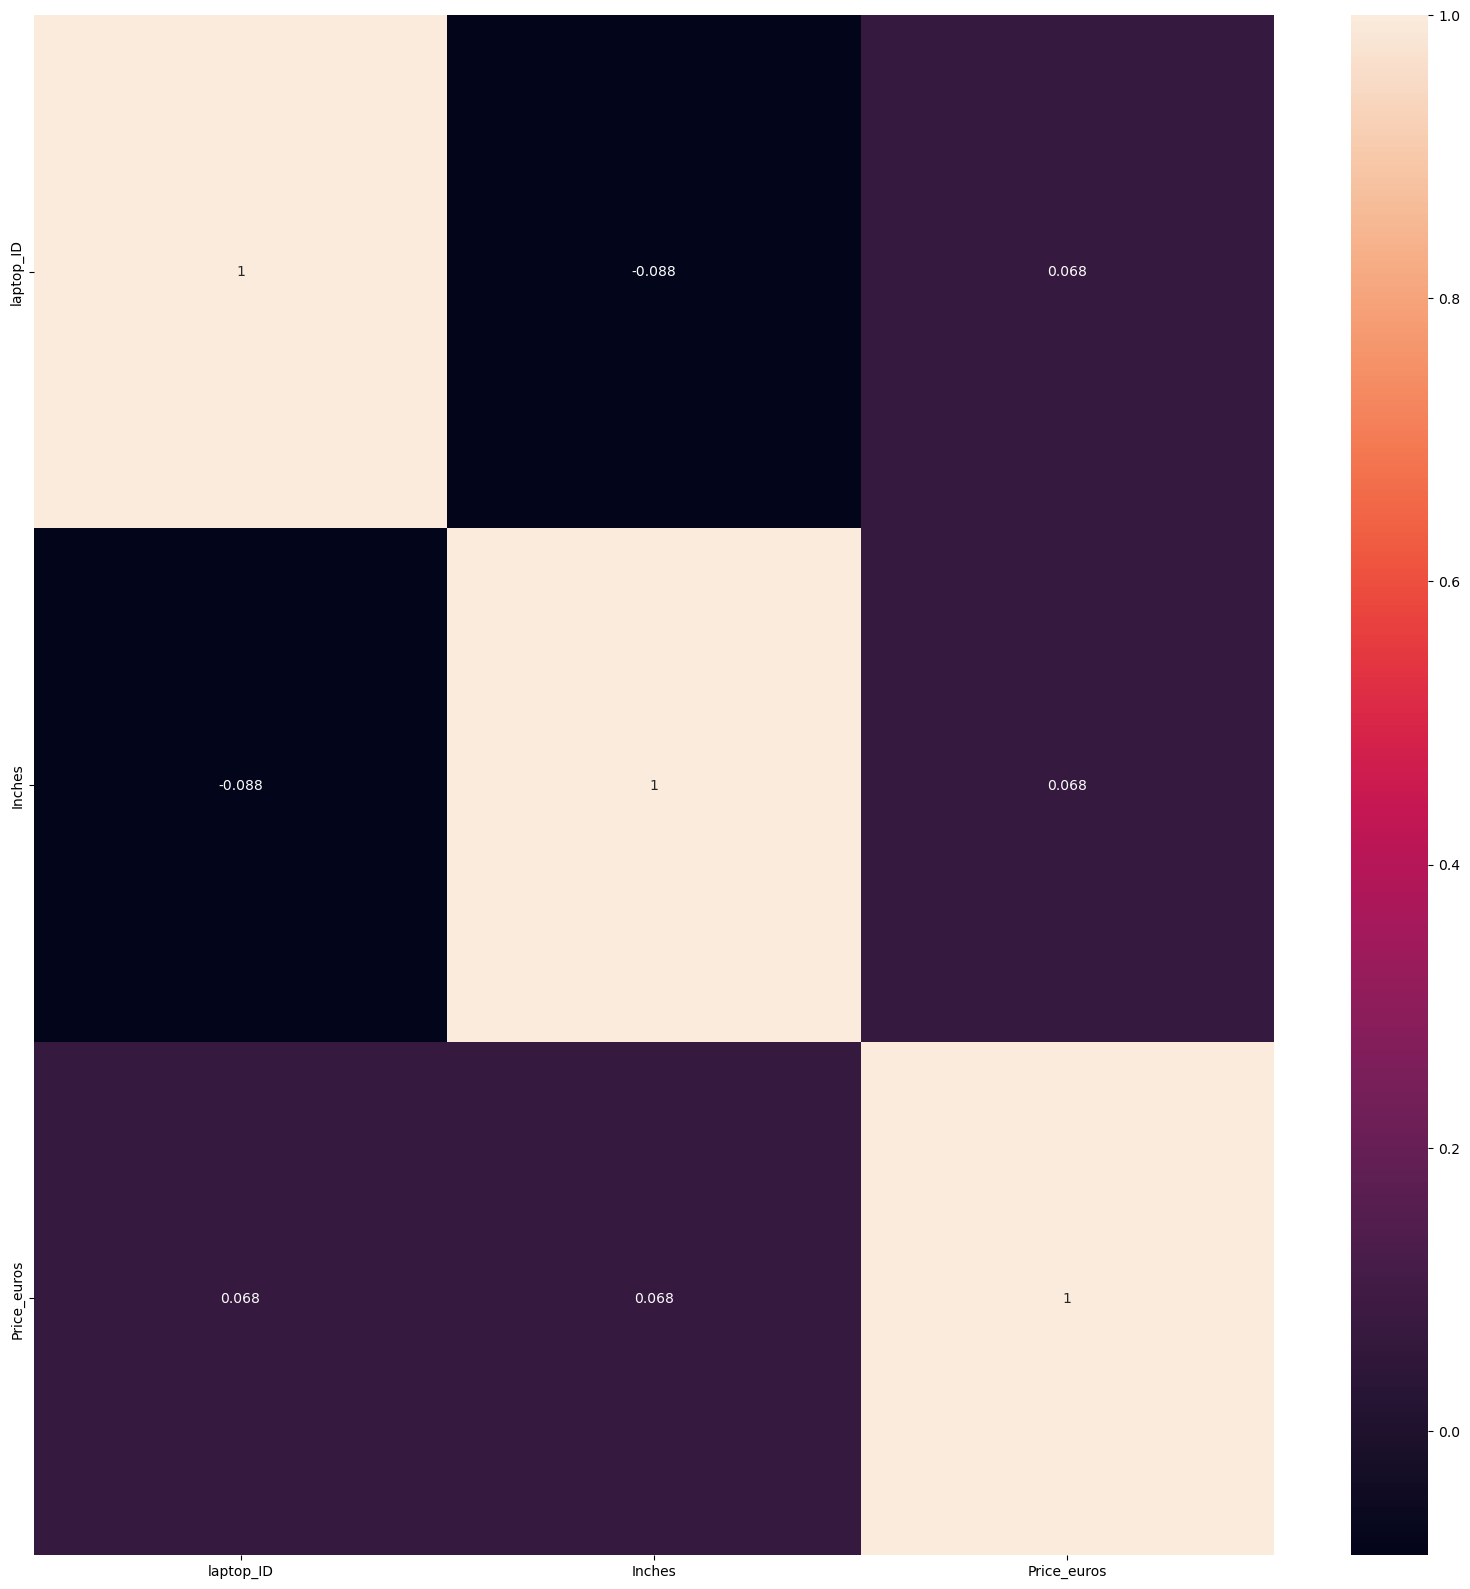

In [8]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(numeric_only = True) , annot = True)

<Axes: ylabel='Count'>

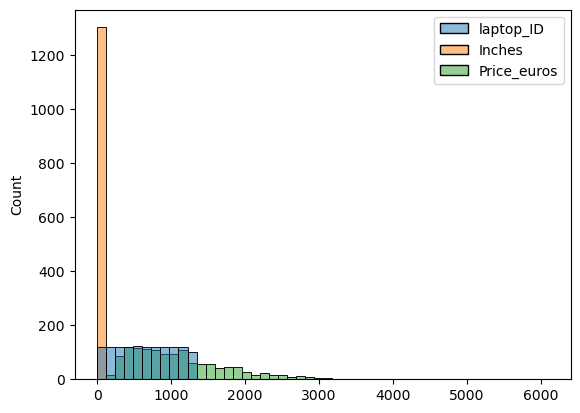

In [9]:
sns.histplot(df)

In [10]:
X = df.drop(columns = "Price_euros")
Y = df["Price_euros"]

In [11]:
!pip install catboost
from catboost import CatBoostRegressor

  Using cached catboost-1.2.5-cp312-cp312-win_amd64.whl.metadata (1.2 kB)
Using cached catboost-1.2.5-cp312-cp312-win_amd64.whl (101.1 MB)


In [12]:
params = {'random_strength': 1 , 'n_estimators': 100,'max_depth': 7 , 'loss_function':'RMSE' , 'learning_rate' : 0.1 ,  'colsample_bylevel': 0.8,
         'bootstrap_type': 'MVS', 'bagging_temperature': 1.0}

In [26]:
model = CatBoostRegressor()

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.Company = le.fit_transform(X.Company)
X.Product = le.fit_transform(X.Product)
X.TypeName = le.fit_transform(X.TypeName)
X.ScreenResolution = le.fit_transform(X.ScreenResolution)
X.Cpu = le.fit_transform(X.Cpu)
X.Memory = le.fit_transform(X.Memory)
X.Gpu = le.fit_transform(X.Gpu)
X.OpSys = le.fit_transform(X.OpSys)
X.Ram = le.fit_transform(X.Ram)
X.Weight = le.fit_transform(X.Weight)

In [30]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
Y = s.fit_transform(Y.values.reshape(-1,1))

In [32]:
X["Weight"]

0        38
1        35
2        74
3        71
4        38
       ... 
1298     78
1299     41
1300     56
1301    104
1302    113
Name: Weight, Length: 1303, dtype: int32

In [34]:
model.fit(X,Y)

Learning rate set to 0.042691
0:	learn: 0.9753231	total: 153ms	remaining: 2m 32s
1:	learn: 0.9524458	total: 160ms	remaining: 1m 19s
2:	learn: 0.9308651	total: 167ms	remaining: 55.6s
3:	learn: 0.9103884	total: 174ms	remaining: 43.3s
4:	learn: 0.8906420	total: 182ms	remaining: 36.2s
5:	learn: 0.8729276	total: 188ms	remaining: 31.2s
6:	learn: 0.8543215	total: 195ms	remaining: 27.7s
7:	learn: 0.8374148	total: 202ms	remaining: 25.1s
8:	learn: 0.8219078	total: 208ms	remaining: 22.9s
9:	learn: 0.8059679	total: 212ms	remaining: 21s
10:	learn: 0.7904044	total: 217ms	remaining: 19.5s
11:	learn: 0.7769914	total: 220ms	remaining: 18.1s
12:	learn: 0.7641865	total: 225ms	remaining: 17.1s
13:	learn: 0.7505824	total: 229ms	remaining: 16.1s
14:	learn: 0.7395787	total: 233ms	remaining: 15.3s
15:	learn: 0.7259926	total: 237ms	remaining: 14.6s
16:	learn: 0.7140978	total: 241ms	remaining: 14s
17:	learn: 0.7022224	total: 246ms	remaining: 13.4s
18:	learn: 0.6909004	total: 250ms	remaining: 12.9s
19:	learn: 0.

In [44]:
import warnings
warnings.filterwarnings('ignore')
model_predict = model.predict(X)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("MSE: ", mean_squared_error(Y, model_predict))
print("MAE: ", mean_absolute_error(Y, model_predict))
print("R2: ", r2_score(Y, model_predict))
print("RMSE: ", mean_squared_error(Y, model_predict, squared=False))


MSE:  0.014354873196945553
MAE:  0.08878259194632505
R2:  0.9856451268030545
RMSE:  0.11981182411158571


In [40]:
model_score = model.score(X,Y)
model_score

0.9856451268030545

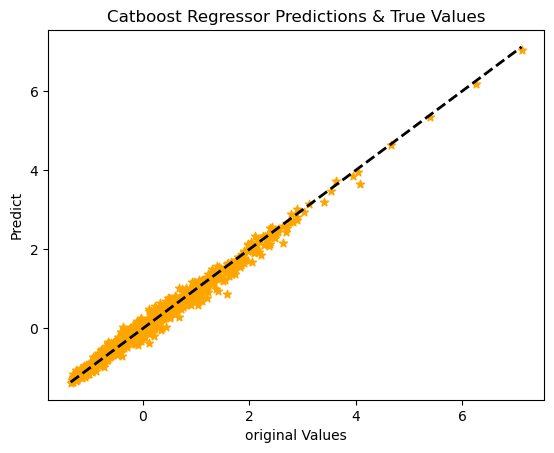

In [42]:
plt.scatter(Y,model_predict, marker = '*' , c = 'orange')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)],linestyle='--', color='black', linewidth=2)
plt.xlabel("original Values")
plt.ylabel("Predict")
plt.title("Catboost Regressor Predictions & True Values")
plt.show()